<a href="https://colab.research.google.com/github/okankiraz/YDP-Proje-DigitRecognizer/blob/main/digit_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Google Drive dosyaları yükleme kısmı
train_data = pd.read_csv('/content/drive/MyDrive/digit-recognizer/train.csv')  # train.csv dosyasını ekledim
test_data = pd.read_csv('/content/drive/MyDrive/digit-recognizer/test.csv')    # test.csv dosyasını ekledim
sample_submission = pd.read_csv('/content/drive/MyDrive/digit-recognizer/sample_submission.csv')  # sample_submission.csv dosyasını ekledim


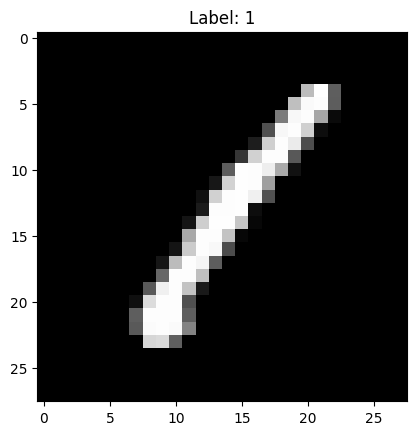

In [ ]:
# Eğitim verilerini hazırlıyoruz
x_train = train_data.drop('label', axis=1).values  # 'label' sütununda işlem yapalım
y_train = train_data['label'].values

# Test verileri ayarı
x_test = test_data.values

# Verileri normalleştirme
x_train = x_train / 255.0
x_test = x_test / 255.0

# Eğitim verisinin bir örneğini görselleştirelim
import matplotlib.pyplot as plt
plt.imshow(x_train[0].reshape(28, 28), cmap='gray')  # 28x28 bir görsel ekrana gelsin
plt.title(f"Label: {y_train[0]}")
plt.show()


In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input

# Modeli oluşturun
model = Sequential([
    Input(shape=(784,)),         # Giriş şekli burada tanımlanıyor
    Flatten(),                   # Flatten katmanında input_shape kullanılmıyor
    Dense(128, activation='relu'),  # Gizli katman
    Dense(10, activation='softmax') # Çıkış katmanı (0-9 rakamları)
])

# Modeli derleyelim
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Modelin eğitilmesi
model.fit(x_train, y_train, epochs=5)



Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8581 - loss: 0.4970
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9608 - loss: 0.1363
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9738 - loss: 0.0888
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9803 - loss: 0.0660
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9849 - loss: 0.0498


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


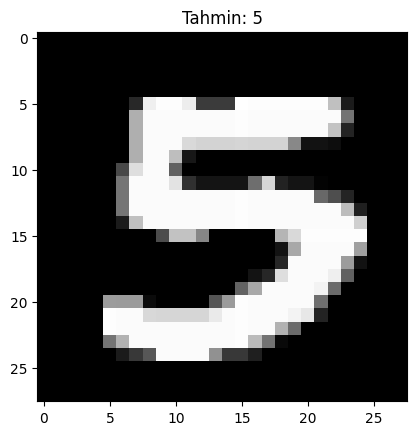

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


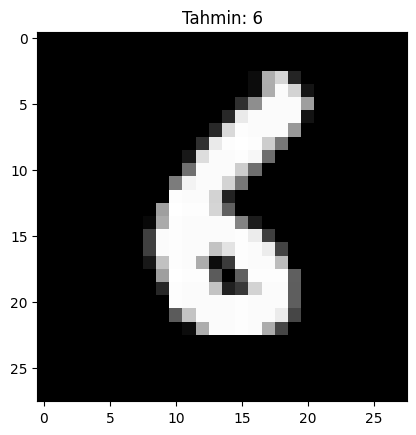

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


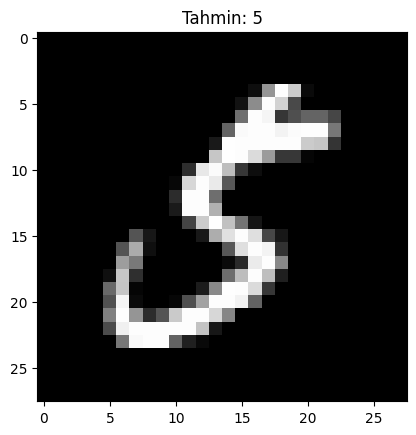

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


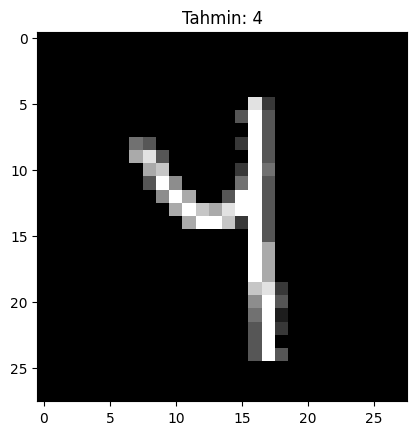

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


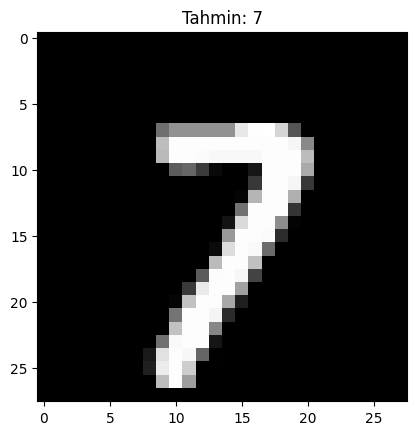

In [26]:
import random
import matplotlib.pyplot as plt

# Rastgele 5 test verisi seçelim
random_indices = random.sample(range(len(x_test)), 5)

for idx in random_indices:
    # Görseli derle
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')

    # Tahmin yapalım
    prediction = model.predict(x_test[idx].reshape(1, 784)).argmax(axis=1)[0]

    # Tahmin edilen etiketi başlık olarak gösterelim
    plt.title(f"Tahmin: {prediction}")
    plt.show()



In [27]:
# Test verileri üzerinde tahmin yapalım
predictions = model.predict(x_test)

# Tahminlerin sonucu (class)
predicted_labels = predictions.argmax(axis=1)

# Sample submission dosyasını yükleyelim
sample_submission['Label'] = predicted_labels

# Sonuçları bir dosyaya kaydedelim
sample_submission.to_csv('/content/drive/MyDrive/digit-recognizer/submission.csv', index=False)

print("Tahminleri 'submission.csv' dosyasına kaydettim.")


875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Tahminleri 'submission.csv' dosyasına kaydettim.
